  Play Tennis  Outlook_Rain  Outlook_Sunny  Temperature_Hot  Temperature_Mild  \
0          No         False           True             True             False   
1          No         False           True             True             False   
2         Yes         False          False             True             False   
3         Yes          True          False            False              True   
4         Yes          True          False            False             False   

   Humidity_Normal  Wind_Weak  
0            False       True  
1            False      False  
2            False       True  
3            False       True  
4             True       True  
Accuracy: 0.6666666666666666


[Text(0.4444444444444444, 0.875, 'Wind_Weak <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = Yes'),
 Text(0.2222222222222222, 0.625, 'Humidity_Normal <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = No'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(0.3333333333333333, 0.375, 'Outlook_Rain <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Yes'),
 Text(0.2222222222222222, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Yes'),
 Text(0.4444444444444444, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.6666666666666666, 0.625, 'Outlook_Sunny <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = Yes'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes'),
 Text(0.7777777777777778, 0.375, 'Humidity_Normal <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\ncl

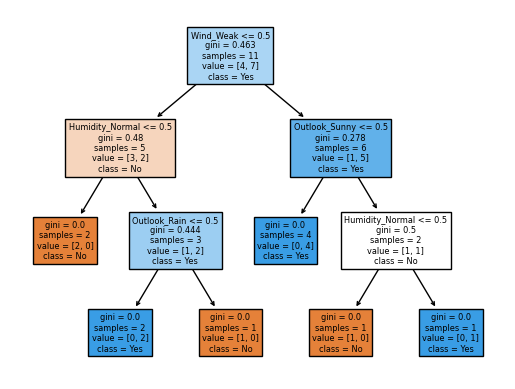

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# Create the Play Tennis dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play Tennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Preprocess the dataset
le = LabelEncoder()
enc = OneHotEncoder(handle_unknown='ignore')
df = pd.get_dummies(df, prefix=['Outlook'], columns = ['Outlook'], drop_first=True)
df = pd.get_dummies(df, prefix=['Temperature'], columns = ['Temperature'], drop_first=True)
df = pd.get_dummies(df, prefix=['Humidity'], columns = ['Humidity'], drop_first=True)
df = pd.get_dummies(df, prefix=['Wind'], columns = ['Wind'], drop_first=True)
print(df.head())

"""df['Outlook'] = enc.fit_transform(df['Outlook'])
df['Temperature'] = enc.fit_transform(df['Temperature'])
df['Humidity'] = enc.fit_transform(df['Humidity'])
df['Wind'] = enc.fit_transform(df['Wind']) """
df['Play Tennis'] = le.fit_transform(df['Play Tennis'])

# Split the dataset into training and testing sets
X = df.drop('Play Tennis', axis=1)
y = df['Play Tennis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision tree
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
